#### 1) Import useful modules
#### 2) Define the potentials
#### 3) Test slow-roll (non-)validity
#### 4) Tree level calculations
#### 5) Slow-roll useful functions
#### 6) General case calculations
#### A) ns, r, alpha_s plan


In [1]:
import mpmath as mp
from mpmath import *
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 13, 8
# %matplotlib notebook
# %matplotlib agg
def define_plot_resolution():
    """
    This function allow to define the resolution of a matplotlib plot on a way
    wich is device independent. Put this before saving any of your plot to get
    homogeneous resolution.
    """

    fig = plt.gcf()  # get current figure

    DPI = fig.get_dpi()
#     fig.set_size_inches(1920.0 / float(DPI), 1080.0 / float(DPI))
    fig.set_size_inches(13, 8)
    ax = plt.gca()
    for tickLabel in ax.get_xticklabels()+ax.get_yticklabels():
        tickLabel.set_fontsize(20)
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.yaxis.offsetText.set_fontsize(20)
    ax.xaxis.offsetText.set_fontsize(20)
    return
sci = lambda a : "%.20e"%a
from scipy.integrate import odeint

mp.dps = 500
mp.prec = 166


# 2) Define the potential

blue : tree, red : lle, green : udd


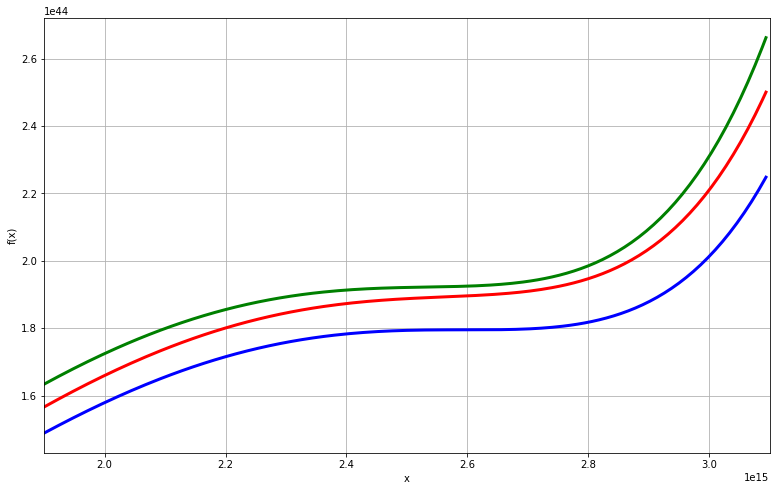

In [2]:

lnMpinGev = mp.mpf('42.334')
Mp = mp.exp(lnMpinGev)

mphi_tree = lambda phi, phigut, mphigut : mphigut
lambda6_tree = lambda phi, phigut, lambda6gut : lambda6gut
A6_tree = lambda phi, phigut, mphigut, A6gut : A6gut

g1gut, g2gut, g3gut = mp.sqrt(mp.pi/mp.mpf('6')), mp.sqrt(mp.pi/mp.mpf('6')), mp.sqrt(mp.pi/mp.mpf('6'))
pre = mp.mpf('1')/(mp.mpf('8')*mp.pi**2)
b1, b2, b3 = pre*mp.mpf('33')/mp.mpf('5'), pre*mp.mpf('1'), pre*mp.mpf('-3')
g1 = lambda phi, phigut : g1gut/(mp.sqrt(1-b1*g1gut**2*mp.log(phi/phigut)))
g2 = lambda phi, phigut : g2gut/(mp.sqrt(1-b2*g2gut**2*mp.log(phi/phigut)))
g3 = lambda phi, phigut : g3gut/(mp.sqrt(1-b3*g3gut**2*mp.log(phi/phigut)))

xi = mp.mpf('1')

mphi_lle = lambda phi, phigut, mphigut : mphigut*mp.sqrt(mp.mpf('1')+xi**2*(mp.mpf('1')-(g2(phi, phigut)/g2gut)**mp.mpf('4'))+xi**2*mp.mpf('1')/11*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('4')))
lambda6_lle = lambda phi, phigut, lambda6gut : lambda6gut*(g2gut/g2(phi, phigut))**mp.mpf('6')*(g2gut/g2(phi, phigut))**(mp.mpf('6')/11)
A6_lle = lambda phi, phigut, mphigut, A6gut : A6gut+mphigut*xi*(mp.mpf('6')*(mp.mpf('1')-(g2(phi, phigut)/g2gut)**mp.mpf('2'))-mp.mpf('6')/11*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('2')))

mphi_udd = lambda phi, phigut, mphigut : mphigut*mp.sqrt(mp.mpf('1')+xi**2*mp.mpf('-8')/9*(mp.mpf('1')-(g3(phi, phigut)/g3gut)**mp.mpf('4'))+xi**2*mp.mpf('4')/99*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('4')))
lambda6_udd = lambda phi, phigut, lambda6gut : lambda6gut*(g3gut/g3(phi, phigut))**(mp.mpf('-8')/9*mp.mpf('6'))*(g3gut/g3(phi, phigut))**(mp.mpf('6')*mp.mpf('4')/99)
A6_udd = lambda phi, phigut, mphigut, A6gut : A6gut+mphigut*xi*((mp.mpf('-8')/9*mp.mpf('6'))*(mp.mpf('1')-(g3(phi, phigut)/g3gut)**mp.mpf('2'))-mp.mpf('6')*mp.mpf('4')/99*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('2')))

def V_MSSM(phi, infl_type, mphigut, A6gut, lambda6gut):
    phigut = mp.mpf('3e16')
    if infl_type == 0 or infl_type == 'tree':
        mphi_func, A6_func, lambda6_func = mphi_tree, A6_tree, lambda6_tree
    elif infl_type == 1 or infl_type == 'lle':
        mphi_func, A6_func, lambda6_func = mphi_lle, A6_lle, lambda6_lle
    elif infl_type == 2 or infl_type == 'udd':
        mphi_func, A6_func, lambda6_func = mphi_udd, A6_udd, lambda6_udd
    else:
        return 'Error: unknown type of inflation'
    lambda6 = lambda6_func(phi, phigut, lambda6gut)
    mphi = mphi_func(phi, phigut,mphigut)
    A6 = A6_func(phi, phigut, mphigut, A6gut)
    V = mp.mpf('0.5')*mphi**mp.mpf('2')*phi**mp.mpf('2')-lambda6*A6/(mp.mpf('6')*Mp**mp.mpf('3'))*phi**mp.mpf('6')+lambda6**mp.mpf('2')*phi**mp.mpf('10')/Mp**mp.mpf('6')
    return V

################# POTENTIALS COMPARAISON #######################

mphigut = mp.mpf('1e7')
A6gut = mp.sqrt('40')*mp.mpf('1e7')
lambda6gut = mp.mpf('1')
print('blue : tree, red : lle, green : udd')
mp.plot([lambda mu : V_MSSM(mu, 'tree', mphigut, A6gut, lambda6gut), lambda mu : V_MSSM(mu, 'lle', mphigut, A6gut, lambda6gut), lambda mu : V_MSSM(mu, 'udd', mphigut, A6gut, lambda6gut)], xlim=(1.9e15, 3.1e15))
# ax = plt.gca()
# ax.set_xlabel(r'$\phi$ (GeV)')
# ax.set_ylabel(r'$V(\phi)$ (GeV$^4$)')
# define_plot_resolution()



# 3) Test slow-roll (non-)validity

zoom in the center untill phidot/Mp² +- 8e-5 and phi/Mp ~ 0.5 to see how the slow roll is missed


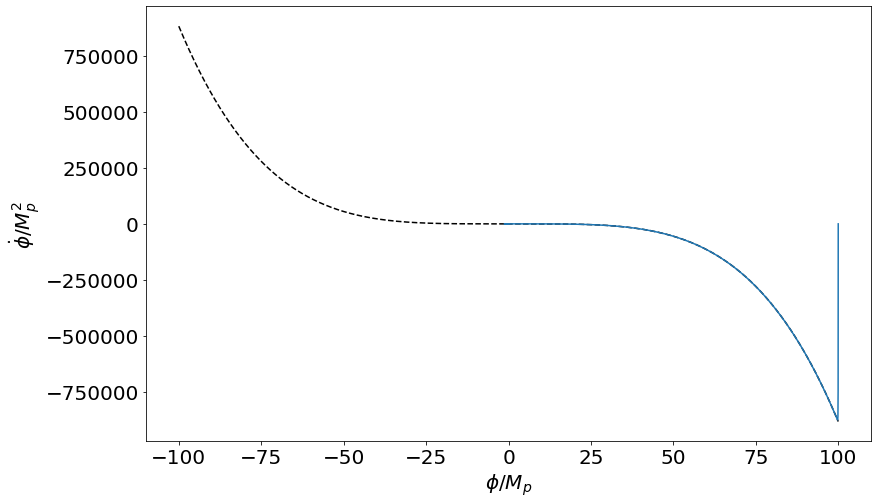

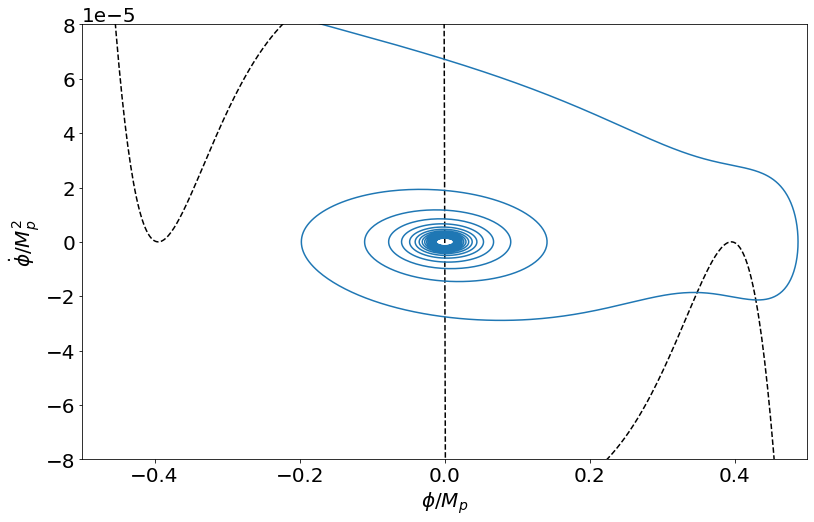

In [3]:
def Vtree(phi, mphi, A6, lambda6):
    return 0.5*mphi**2*phi**2-A6*lambda6/(6*Mp**3)*phi**6+lambda6**2*phi**10/Mp**6

def dVtreedphi(phi, mphi, A6, lambda6):
    return mphi**2*phi-A6*lambda6/(Mp**3)*phi**5+10*lambda6**2*phi**9/Mp**6

def phidot_slowroll(phi, mphi, A6, lambda6):
    return -Mp*dVtreedphi(phi, mphi, A6, lambda6)/(np.sqrt(3)*np.sqrt(Vtree(phi, mphi, A6, lambda6)))

def traj(y, t, mphi, A6, lambda6):
    phi, phidot = y
    dydt = [phidot, -(dVtreedphi(phi, mphi, A6, lambda6)+3**0.5/Mp*phidot*np.sqrt(phidot**2/2+Vtree(phi, mphi, A6, lambda6)))]
    return dydt

############### TRAJECTORIES : VALIDITY OF SR ??? ##############
print('zoom in the center untill phidot/Mp² +- 8e-5 and phi/Mp ~ 0.5 to see how the slow roll is missed')

mphi = 4285661129.856315476257436204924610602145286935627
lambda6 = 0.00000002291199873463820971135881534315253567640122321974
A6 = 27104899996.9236774536602006784099571257654061477

phi_list = np.linspace(float(-100*Mp), float(100*Mp), 100000)
t = np.logspace(-20.5, -7.5, 10000)
y0 = [100*Mp, 0]#phidot_slowroll(100*Mp, mphi, A6, lambda6)]
sol = odeint(traj, y0, t, args=(mphi, A6, lambda6))
slowroll_list = phidot_slowroll(phi_list, mphi, A6, lambda6)/(0.000015*Mp**2)
plt.figure()
plt.plot(phi_list/Mp, slowroll_list, linestyle='--', color='black')
plt.plot(sol[:, 0]/Mp,sol[:, 1]/(0.000015*Mp**2))
plt.xlabel(r'$\phi/M_p$')
plt.ylabel(r'$\dot\phi/M_p^2$')
define_plot_resolution()
plt.figure()
plt.plot(phi_list/Mp, slowroll_list, linestyle='--', color='black')
plt.plot(sol[:, 0]/Mp,sol[:, 1]/(0.000015*Mp**2))
plt.xlim(-0.5,0.5)
plt.ylim(-8e-5,8e-5)
plt.xlabel(r'$\phi/M_p$')
plt.ylabel(r'$\dot\phi/M_p^2$')
define_plot_resolution()

# 4) Tree : phi0, As, ns -> mphi, A, lambda
#### aspic.gmssmi, fast => will save time and energy for next blocks

In [4]:
def norm_potential(x,alpha,phi0):
    return x**mp.mpf('2')-mp.mpf('2')/3*alpha*x**6+alpha/mp.mpf('5')*x**10

def norm_eps1(x,alpha,phi0):
    return mp.mpf('450')*(mp.mpf('1')+alpha*x**4*(-mp.mpf('2')+x**4))**2/((phi0*x)**mp.mpf('2')*(mp.mpf('15')+alpha*x**4*(-mp.mpf('10')+mp.mpf('3')*x**4))**2)

def norm_eps2(x,alpha,phi0):
    return (mp.mpf('60')*(mp.mpf('15')+alpha*x**mp.mpf('4')*(mp.mpf('40')+x**mp.mpf('4')*(-mp.mpf('78')+alpha*(mp.mpf('20')+mp.mpf('3')*x**8)))))/(phi0**2*x**2*(mp.mpf('15')+alpha*x**mp.mpf('4')*(-mp.mpf('10')+mp.mpf('3')*x**4))**2)
       
def norm_eps3(x,alpha,phi0):
    return (mp.mpf('60')*(mp.mpf('1')+alpha*x**4*(-mp.mpf('2')+x**mp.mpf('4')))*(mp.mpf('225')+alpha*x**mp.mpf('4')*(-mp.mpf('1350')+x**4*(mp.mpf('3915')+alpha*(-mp.mpf('2100')+mp.mpf('20')*(mp.mpf('81')-mp.mpf('10')*alpha)*x**4+mp.mpf('15')*(-mp.mpf('99')+mp.mpf('20')*alpha)*x**mp.mpf('8')+mp.mpf('90')*alpha*x**mp.mpf('12')+mp.mpf('9')*alpha*x**16)))))/(x**2*(mp.mpf('15')+alpha*x**mp.mpf('4')*(-mp.mpf('10')+mp.mpf('3')*x**4))**2*(mp.mpf('15')+alpha*x**4*(mp.mpf('40')+x**4*(-mp.mpf('78')+alpha*(mp.mpf('20')+mp.mpf('3')*x**8)))))/phi0**2

def x_endinf(alpha,phi0):
    xstart = mp.mpf('0.9841521')
    return mp.findroot(lambda x : norm_eps1(x,alpha,phi0)-mp.mpf('1'), xstart,solver='halley', verbose = False)

def efold_primitive(x,alpha,phi0):
    aplus=-alpha+mp.sqrt((alpha**2-alpha)*mp.mpc('1','0'))
    aminus=-alpha-mp.sqrt((alpha**2-alpha)*mp.mpc('1','0'))
    bplus=mp.mpf('2')*(aplus+alpha/mp.mpf('3'))/(aplus-aminus)
    bminus=mp.mpf('2')*(aminus+alpha/mp.mpf('3'))/(aminus-aplus)
    return phi0**2*(mp.re(x**2/20+bplus/(10*mp.sqrt(aplus))*mp.atan(mp.sqrt(aplus)*x**2)+bminus/(10*mp.sqrt(aminus))*mp.atan(mp.sqrt(aminus)*x**2)))

def get_calfconst_rrad(lnRrad,Pstar,epsEnd,potEnd):
    cmbMeasuredQuart = mp.mpf('0.25')*mp.log(Pstar*mp.mpf('8')*mp.pi**2)
    kstar, lnMpcToKappa, HubbleSquareRootOf3OmegaRad, RelatDofRatio = mp.mpf('0.05'), mp.mpf('130.282'), mp.mpf('7.5437e-63'), mp.mpf('1')
    N0 = mp.log(kstar) - lnMpcToKappa - mp.mpf('0.5')*mp.log(HubbleSquareRootOf3OmegaRad) - mp.mpf('0.25')*mp.log(RelatDofRatio)
    return - N0 + cmbMeasuredQuart-mp.mpf('0.25')*mp.log(potEnd/(mp.mpf('3')-epsEnd)) + lnRrad

def x_rrad(alpha,phi0,lnRrad,Pstar):
    xEnd = x_endinf(alpha,phi0)
    epsOneEnd = norm_eps1(xEnd,alpha,phi0)
    potEnd = norm_potential(xEnd,alpha,phi0)
    primEnd = efold_primitive(xEnd,alpha,phi0)
    calF = get_calfconst_rrad(lnRrad,Pstar,epsOneEnd,potEnd)
    calFplusNuEnd = calF+primEnd
    x_eps10 = 1
    return mp.findroot(lambda x : find_x_rrad(x, alpha, phi0,calFplusNuEnd), mp.mpf('1'), solver='halley', verbose = False)

def find_reheat_rrad_leadorder(nuStar,calFplusNuEnd,epsOneStar,Vstar):
    return nuStar - calFplusNuEnd + mp.mpf('0.25')*mp.log(mp.mpf('9')/(epsOneStar*Vstar))

def find_x_rrad(x,alpha,phi0,calFplusNuEnd):
    nuStar = efold_primitive(x,alpha,phi0)
    epsOneStar = norm_eps1(x,alpha,phi0)
    Vstar = norm_potential(x,alpha,phi0)
    res = find_reheat_rrad_leadorder(nuStar,calFplusNuEnd,epsOneStar,Vstar)
    return res

def ns_from_alpha(alpha, phi0B, lnRrad, Pstar):
    phi0 = phi0B*((5*alpha+mp.sqrt(mp.mpf('25')*alpha**2-mp.mpf('9')))/(9*alpha))**(-mp.mpf('0.25'))
    xstar = x_rrad(alpha, phi0, lnRrad, Pstar)
    return mp.mpf('1')-2*norm_eps1(xstar, alpha, phi0)-norm_eps2(xstar, alpha, phi0)

def alpha_coeff(phi0_B,lnRrad):
    phi0_B_Vec=[0.000001,0.000003,0.00001,0.0001,0.001,0.01,0.1]
    if lnRrad == 0:
      coeff_Vec=[2.5,2.2,2.05,1.7,1.4,1.2,1.]
    elif lnRrad == -10:
      coeff_Vec=[5.2,4.4,3.8,3.,2.4,2.,1.6]
    i=0
    while(phi0_B > phi0_B_Vec[i] and i < 5):
        i=i+1
    i = i-1
    return coeff_Vec[i]+(coeff_Vec[i+1]-coeff_Vec[i])*mp.log(phi0_B/phi0_B_Vec[i])/mp.log(phi0_B_Vec[i+1]/phi0_B_Vec[i])

def alpha_from_phi0B_and_ns(phi0B, ns, lnRrad,Pstar):
    alpha_min = mp.mpf('1')-alpha_coeff(phi0B,lnRrad)*phi0B**4*mp.pi**2/(mp.mpf('900')*mp.mpf('50')**2)
    alpha_max = mp.fsub(mp.mpf('1'),mp.mpf('1e-30'))
    return mp.findroot(lambda alpha : ns_from_alpha(alpha, phi0B, lnRrad, Pstar)-ns, (alpha_min, alpha_max), solver='anderson', verbose=False)

def aspic(lnRrad, ns_f, phi0_input, Pstar):
    phi0B_list, phistar_list, alpha_list, mphi_list, A6_list, lambda6_list, ns_list, r_list, alphas_list = [], [], [], [], [], [], [], [], []
    nphi0 = len(phi0_input)
    for i, phi0B in enumerate(phi0_input):
#         start = time.process_time()

        alpha = alpha_from_phi0B_and_ns(phi0B/Mp, ns_f, lnRrad, Pstar)
        phi0 = phi0B*((5*alpha+mp.sqrt(mp.mpf('25')*alpha**2-mp.mpf('9')))/(9*alpha))**(-mp.mpf('0.25'))
        xstar = x_rrad(alpha, phi0/Mp, lnRrad, Pstar)
        eps1 = norm_eps1(xstar,alpha,phi0/Mp)
        eps2 = norm_eps2(xstar,alpha,phi0/Mp)
        eps3 = norm_eps3(xstar,alpha,phi0/Mp)
        
        ns, r, alpha_s = 1 - 2*eps1 - eps2, 16*eps1, -2*eps1*eps2-eps2*eps3
        M = (Pstar * 8 * mp.pi**2 * Mp**2 * eps1 * 3 * Mp**2 / norm_potential(xstar,alpha,phi0/Mp))**mp.mpf('0.25')
        mphiBoehm2 = 2 * M**4 / (phi0)**2 
        AB=mp.sqrt(80*alpha)*M**2/(phi0)
        lambdaB=Mp**3*mp.sqrt(alpha/5)*M**2/(phi0)**5
 
        phi0B_list.append(phi0B)
        phistar_list.append(xstar*phi0)
        alpha_list.append(alpha)
        mphi_list.append(mphiBoehm2**0.5)
        A6_list.append(AB)
        lambda6_list.append(lambdaB)
        ns_list.append(ns)
        r_list.append(r)
        alphas_list.append(alpha_s)

#     print('□', end='')
    return phi0B_list, phistar_list, alpha_list, mphi_list, A6_list, lambda6_list, ns_list, r_list, alphas_list

############ GENERATE A TREE POINT ##############

phi0_input_list = [mp.mpf('3e14')]
lnRrad = mp.mpf('0')
As_input = mp.mpf('2.10310517e-9')
ns_input = mp.mpf('0.9653')
phi0B_list, phistar_list, alpha_list, mphi_list, A6_list, lambda6_list, ns_list, r_list, alphas_list = aspic(lnRrad, ns_input, phi0_input_list, As_input)
for i, phi0B in enumerate(phi0B_list):
    print('phi0B =', nstr(phi0B, 30))
    print('mphi =', nstr(mphi_list[i], 30))
    print('A =', nstr(A6_list[i], 30))
    print('lambda =', nstr(lambda6_list[i], 30))
    print('ns =', nstr(ns_list[i], 30))
    print('r =', nstr(r_list[i], 30))
    

phi0B = 300000000000000.0
mphi = 753.878382433157415434378767394
A = 4767.94553450449535306502449266
lambda = 0.421778134704439636102771332117
ns = 0.9653
r = 1.25855279586646359415248166358e-32


# 5) Basic slow-roll functions

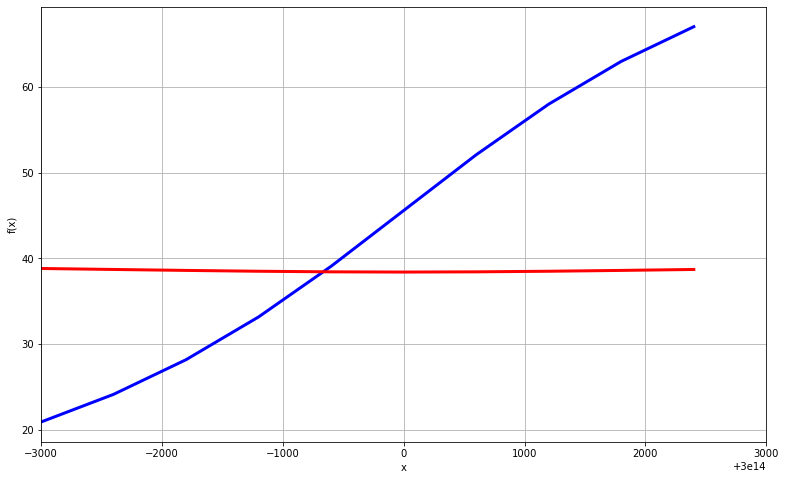

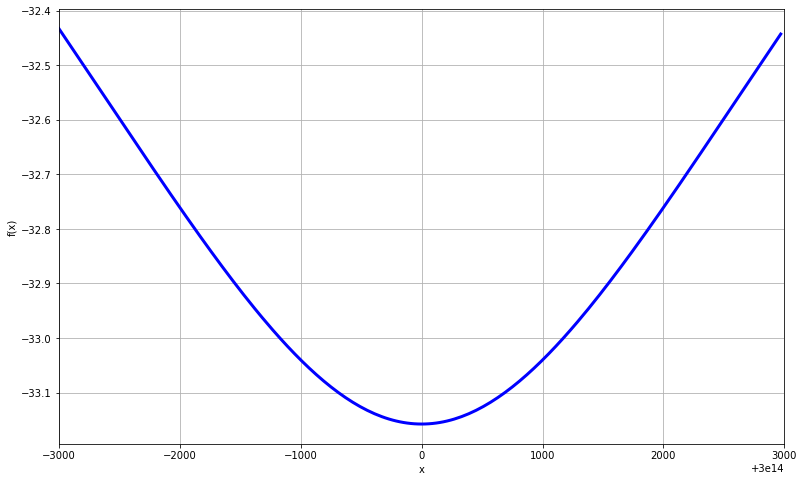

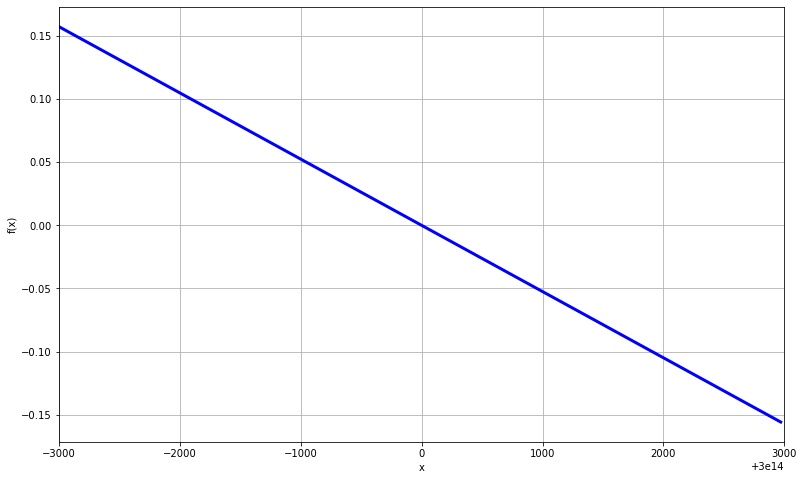

In [5]:
def DV(V, phi):
     return (V(phi+1)-V(phi-1))/mp.mpf('2')

def D2V(V, phi):
    return (V(phi+1)+V(phi-1)-2*V(phi))/mp.mpf('1')

def eps1_(V, phi):
    return mp.fdiv(mp.power((mp.fmul((mp.mpf(1)*Mp),mp.fdiv(DV(V, phi),V(phi)))),2),2)

def eps2_(V, phi):
    return mp.fmul(mp.fmul(2,mp.power(Mp,2)),mp.fsub(mp.power(mp.fdiv(DV(V, phi),V(phi)),2),mp.fdiv(D2V(V, phi),V(phi))))

def N(V, phimin, phimax):
    mp.dps = 50
    integ = mp.quad(lambda phi : V(phi)/DV(V, phi), [phimin, phimax])
    mp.dps = 500
#     print('.', end="", flush=True)
    return -integ/Mp**2

def find_phi_st(V, phi, phi_end, Pstar, lnRrad):
    kstar, lnMpcToKappa, HubbleSquareRootOf3OmegaRad, RelatDofRatio = 0.05, 130.282, 7.5437e-63, 1
    N0 = log(kstar) - lnMpcToKappa - 0.5*log(HubbleSquareRootOf3OmegaRad) -0.25*log(RelatDofRatio)
    Delta_N_star = N(V, phi, phi_end)
    return -Delta_N_star + lnRrad - N0 - 0.25*mp.log(9/eps1_(V, phi)/(3-eps1_(V, phi_end))*V(phi_end)/V(phi))+0.25*mp.log(8*mp.pi**2*Pstar)

def ns_(V, phi):
    return mp.fsub(mp.fsub(1,2*eps1_(V, phi)),eps2_(V, phi))

def endinf(V, start):
    return mp.findroot(lambda phi: eps1_(V, phi)-1, 0.95*start, tol = 1e-30)

def phi_star(V, Pstar, lnRrad, phi_single):
    # extensions dispos si pas de guess, ou si on explore les potentiels non monotones
    phi_0 = mp.findroot(lambda phi : D2V(V, phi), phi_single, tol=5e-18)
    try:
        phi_0
    except:
        print('échec trouver un phi_0')
        return nan
    phi_start = phi_0
    phi_end = endinf(V, phi_start*0.98)
    Ntot = N(V, phi_end, phi_start-1)

    if -Ntot > 22.4:
#         try:
        phi_star = mp.findroot(lambda phi : find_phi_st(V, phi, phi_end, Pstar, lnRrad), x0 = (phi_start-10,phi_start+10), maxsteps = 30, verbose = False, method='ridder', tol = 1e-25)
        return phi_star
#         except:
#             print('échec trouver un phi_star (malgré assez efolds...)')
#             return mp.mpf(nan)
    else:
        print('pas assez efolds')
        return float(nan)

def P_star(V, phi_sta):
    Vstar = V(phi_sta)
    eps1star = eps1_(V, phi_sta)
    return Vstar/(Mp**4*24*mp.pi**2*eps1star)

########### PLOT N, eps1, eps2 vs phi FOR TREE POINT GENERATED in 4) ###################

V = lambda phi : V_MSSM(phi, 'tree', mphi_list[0], A6_list[0], lambda6_list[0])
phi_start = phi0B_list[0]
phi_end = endinf(V, phi_start*0.98)
xlim = (phi_start*0.99999999999, phi_start*(2-0.99999999999))
kstar, lnMpcToKappa, HubbleSquareRootOf3OmegaRad, RelatDofRatio = 0.05, 130.282, 7.5437e-63, 1
N0 = log(kstar) - lnMpcToKappa - 0.5*log(HubbleSquareRootOf3OmegaRad) -0.25*log(RelatDofRatio)
lnRrad = 0
mp.plot([lambda phi : -N(V, phi_end, phi), lambda phi : lnRrad - N0 - 0.25*mp.log(9/eps1_(V, phi)/(3-eps1_(V, phi_end))*V(phi_end)/V(phi))+0.25*mp.log(8*mp.pi**2*As_input)], xlim=xlim, points=10)
mp.plot(lambda phi : mp.log10(eps1_(V, phi)), xlim=xlim)
mp.plot(lambda phi : eps2_(V, phi), xlim=xlim)


# 6) General : phi0, As, ns -> mphi, A, lambda


In [6]:
def mphi_versus_phi_V_prime_eq_0f(phi, A6, lambda6, mphi_ini, infl_type):
    return mp.findroot(lambda mphi : DV(lambda phi : V_MSSM(phi, infl_type, mphi, A6, lambda6), phi),mphi_ini, verbose=False, tol=5e-18)

def mphi_and_phi0(A6, lambda6, mphi_ini, phi0_tree, infl_type):
    single_point = mp.findroot(lambda phi : DV(lambda phi : mphi_versus_phi_V_prime_eq_0f(phi, A6, lambda6, mphi_ini, infl_type),phi), phi0_tree, verbose = False, tol=1e-25)
#     print('◉', end='')
    return mphi_versus_phi_V_prime_eq_0f(single_point, A6, lambda6, mphi_ini, infl_type), single_point

def ns_star(mphi_start, phi0_start, A6, lambda6, Pstar, lnRrad, infl_type):
    phi_sta = phi_star(lambda phi : V_MSSM(phi, infl_type, mphi_start, A6, lambda6), Pstar, lnRrad, phi0_start)
    ns_star = ns_(lambda phi : V_MSSM(phi, infl_type, mphi_start, A6, lambda6), phi_sta)
    res_P = P_star(lambda phi : V_MSSM(phi, infl_type, mphi_start, A6, lambda6), phi_sta)
    return float(ns_star)

def from_ns_find_mphi(ns, mphi_start, phi0_start, A6, lambda6, Pstar, lnRrad, infl_type):
    ns_star_i = lambda i : ns_star(mphi_start*(mp.mpf('1')+i*mp.mpf('1e-24')), phi0_start, A6, lambda6, Pstar, lnRrad, infl_type)
    i_tuned = mp.findroot(lambda i : ns_star_i(i)-ns, 0, verbose=False,tol = 1e-16)
    mphi_tuned = mphi_start*(mp.mpf('1')+i_tuned*mp.mpf('1e-24'))
    return mphi_tuned

def normalize(mphi_nsed, A6, lambda6, phi0_start, Pstar, lnRrad, infl_type):
    V_to_renormalize =  lambda phi : V_MSSM(phi, infl_type, mphi_nsed, A6, lambda6)
    phi0_to_renormalize = mp.findroot(lambda phi : D2V(V_to_renormalize, phi), phi0_start, tol=5e-18)
    phi_sta_to_renormalize = phi_star(V_to_renormalize, Pstar, lnRrad, phi0_to_renormalize)
    P_star_to_renormalize = P_star(V_to_renormalize, phi_sta_to_renormalize)
    P_star_cosmo = Pstar
    normalization = P_star_cosmo/P_star_to_renormalize
    mphi, A6, lambda6 = mphi_nsed*mp.sqrt(normalization), A6*mp.sqrt(normalization), lambda6*mp.sqrt(normalization)
    ns_star = ns_(lambda phi : V_MSSM(phi, infl_type, mphi, A6, lambda6), phi_sta_to_renormalize)
#     print(' ns = ', nstr(ns_star, 6) ,' As = ',sci(P_star_cosmo))
    return mphi, A6, lambda6 , phi0_to_renormalize, phi_sta_to_renormalize

def rge_point_generator2(A6, lambda6, mphi_tree, phi0_tree, ns_input, Pstar, lnRrad, infl_type):
    start_time = time.process_time()
    mphi, phi0 = mphi_tree, phi0_tree
    mphi_infl, phi0_infl = mphi_and_phi0(A6, lambda6, mphi, phi0, infl_type)
    alpha = aspic(lnRrad, ns_input, [phi0], Pstar)[2][0]
    mphi_loop = mphi_infl/mp.sqrt(alpha)
    mphi_nsed = from_ns_find_mphi(ns_input, mphi_loop, phi0_infl, A6, lambda6, Pstar, lnRrad, infl_type)

#     print('')
    mphi_renormalized, A6_renormalized, lambda6_renormalized, phi0_to_renormalize, phi_sta_to_renormalize = normalize(mphi_nsed, A6, lambda6, phi0_infl, Pstar, lnRrad, infl_type)
    
#     print('\n\nmphi =', nstr(mphi_renormalized, 50))
#     print('A6 =', nstr(A6_renormalized, 50))
#     print('lambda6 =', nstr(lambda6_renormalized, 50))

    V_renormalized =  lambda phi : V_MSSM(phi, infl_type, mphi_renormalized, A6_renormalized, lambda6_renormalized)
    phi0_renormalized = mp.findroot(lambda phi : D2V(V_renormalized, phi), phi0_to_renormalize, tol=1e-17)
    phi_sta_renormalized = phi_sta_to_renormalize
    
    ns_out = ns_(V_renormalized, phi_sta_renormalized)
#     print('\nns =', nstr(ns_out, 20))
    Pstar_out = P_star(V_renormalized, phi_sta_renormalized)
#     print('P_star =', nstr(Pstar_out, 20))
    phi0 = mp.findroot(lambda phi : D2V(V_renormalized, phi), phi_sta_renormalized)
#     print('phi0 =', nstr(phi0,40))
    r = 16*eps1_(V_renormalized, phi_sta_renormalized)
#     print('r =', nstr(r, 20))
#     print('lnRrad =', lnRrad)

    time_step = time.process_time() - start_time
#     print('\n'+str(time_step) +" sec.\n")
    return mphi_renormalized, A6_renormalized, lambda6_renormalized, ns_out, Pstar_out, phi0, r, phi_sta_renormalized

def contour2(phi0_input_list, lnRrad, ns_input, As_input, infl_type):
    compatible_mphi, compatible_A6, compatible_lambda6, compatible_ns, compatible_Ps, compatible_phi0, compatible_r, compatible_phi_star = [], [], [], [], [], [], [], []
    for i, phi0_input in enumerate(phi0_input_list):
#         print('step '+str(i+1)+'/'+str(len(phi0_input_list))+' (scale = '+"%.5e"%phi0_input+' GeV):\n')
        phi0B_list, phistar_list, alpha_list, mphi_list, A6_list, lambda6_list, ns_list, r_list, alphas_list = aspic(lnRrad, ns_input, [phi0_input], As_input)
        A6, lambda6, mphi_tree, phi0_tree = A6_list[0], lambda6_list[0], mphi_list[0], phi0B_list[0]

#         print('')
        
        mphi_renormalized, A6_renormalized, lambda6_renormalized, ns_out, Ps_out, phi0, r, phi_starr = rge_point_generator2(A6, lambda6, mphi_tree, phi0_tree, ns_input, As_input, lnRrad, infl_type)
        
        compatible_mphi.append(mphi_renormalized)
        compatible_A6.append(A6_renormalized)
        compatible_lambda6.append(lambda6_renormalized)
        compatible_ns.append(ns_out)
        compatible_Ps.append(Ps_out)
        compatible_phi0.append(phi0)
        compatible_r.append(r)
        compatible_phi_star.append(phi_starr)
#         print('\n-------------------------------------------------------------------------------------------------------------------------------\n')
        print(end='.')
    return compatible_mphi, compatible_A6, compatible_lambda6, compatible_ns, compatible_Ps, compatible_phi0, compatible_r, compatible_phi_star

################## GENERATE tree lle udd POINTS from this general function #########################

phi0_input_list = [mp.mpf('3e14')]
lnRrad = mp.mpf('0')
As_input = mp.mpf('2.10310517e-9')
ns_input = mp.mpf('0.9653')

infl_type = 'tree'
print(end = 'tree')
compatible_mphi, compatible_A6, compatible_lambda6, compatible_ns, compatible_Ps, compatible_phi0, compatible_r, compatible_phi_star = contour2(phi0_input_list, lnRrad, ns_input, As_input, infl_type)
for i, phi0B in enumerate(compatible_phi0):
    print('')
    print('phi0B =', nstr(phi0B, 30))
    print('mphi =', nstr(compatible_mphi[i], 30))
    print('A =', nstr(compatible_A6[i], 30))
    print('lambda =', nstr(compatible_lambda6[i], 30))
    print('ns =', nstr(compatible_ns[i], 30))
    print('r =', nstr(compatible_r[i], 30))
    print('\n')
    
print(end = 'lle')
infl_type = 'lle'
compatible_mphi, compatible_A6, compatible_lambda6, compatible_ns, compatible_Ps, compatible_phi0, compatible_r, compatible_phi_star = contour2(phi0_input_list, lnRrad, ns_input, As_input, infl_type)
for i, phi0B in enumerate(compatible_phi0):
    print('')
    print('phi0B =', nstr(phi0B, 30))
    print('mphi =', nstr(compatible_mphi[i], 30))
    print('A =', nstr(compatible_A6[i], 30))
    print('lambda =', nstr(compatible_lambda6[i], 30))
    print('ns =', nstr(compatible_ns[i], 30))
    print('r =', nstr(compatible_r[i], 30))
    print('\n')

print(end = 'udd')
infl_type = 'udd'
compatible_mphi, compatible_A6, compatible_lambda6, compatible_ns, compatible_Ps, compatible_phi0, compatible_r, compatible_phi_star = contour2(phi0_input_list, lnRrad, ns_input, As_input, infl_type)
for i, phi0B in enumerate(compatible_phi0):
    print('')
    print('phi0B =', nstr(phi0B, 30))
    print('mphi =', nstr(compatible_mphi[i], 30))
    print('A =', nstr(compatible_A6[i], 30))
    print('lambda =', nstr(compatible_lambda6[i], 30))
    print('ns =', nstr(compatible_ns[i], 30))
    print('r =', nstr(compatible_r[i], 30))

tree.
phi0B = 300000000000000.000000011517325
mphi = 753.878382433156869624067471984
A = 4767.94553450449190105751629476
lambda = 0.421778134704439330734080088301
ns = 0.965299999999999986209037921053
r = 1.25855279586646177176014544478e-32


lle.
phi0B = 293746258811821.429733072673405
mphi = 704.430409506490789858226685039
A = 4574.29572034553156912352159242
lambda = 0.404647641746676147798412024151
ns = 0.965299999999999996639025748396
r = 1.14791032081171000460198072879e-32


udd.
phi0B = 287384172412584.738203803162216
mphi = 658.802437421178535220160269778
A = 4222.03959890114942494862991132
lambda = 0.373486646142628737537215573319
ns = 0.965299999999999972469956905312
r = 1.06789157833384352956646919916e-32


In [9]:
################### ITERATE ON PHI0 TO GET THE CONTOUR ####################

phi0_input_list = np.array([mp.mpf(str(x)) for x in np.linspace(9e13, 5e16, 20)])
lnRrad_list = [mp.mpf('0')]
As_input = mp.mpf('2.10310517e-9')

# ns_input_list = [mp.mpf('0.9653')-mp.mpf('3')*mp.mpf('0.0041'),mp.mpf('0.9653'),mp.mpf('0.9653')+mp.mpf('3')*mp.mpf('0.0041')]
ns_input_list = [mp.mpf('0.9653')]
direc = ''
infl_type = 'udd'

for lnRrad in lnRrad_list:
    for ns_input in ns_input_list:
        start_time = time.process_time()
        compatible_mphi, compatible_A6, compatible_lambda6, compatible_ns, compatible_Ps, compatible_phi0, compatible_r, compatible_phi_star = contour2(phi0_input_list, lnRrad, ns_input, As_input, infl_type)
        datarge = pd.DataFrame(data={'phi0B':compatible_phi0, 'mphi':compatible_mphi, 'A6':compatible_A6, 'lambda6':compatible_lambda6, 'ns':compatible_ns, 'Ps':compatible_Ps, 'r':compatible_r, 'phi*':compatible_phi_star}, dtype=str)
        name_file = '20pts_m'+str(-(lnRrad))+'_'+infl_type+'_'+str(int(10000*ns_input))+'.csv'
        datarge.to_csv(direc+name_file)
        time_step = time.process_time() - start_time
        print(str(lnRrad)+' '+str(ns_input)+' '+infl_type+' '+str(time_step) +" sec.")
        start_time = time.process_time()

        phi0B_list, phistar_list, alpha_list, mphi_list, A6_list, lambda6_list, ns_list, r_list, alphas_list = aspic(lnRrad, ns_input, compatible_phi0, As_input)
        datatree = pd.DataFrame(data={'phi0B':phi0B_list, 'mphi':mphi_list, 'A6':A6_list, 'lambda6':lambda6_list, 'ns':ns_list, 'Ps':[As_input]*len(phi0_input_list), 'r':r_list, 'phi*':phistar_list}, dtype=str)
        name_file = '20pts_m'+str(-(lnRrad))+'_Tree_'+infl_type+'_'+str(int(10000*ns_input))+'.csv'
        datatree.to_csv(direc+name_file)
        time_step = time.process_time() - start_time
        print(str(lnRrad)+' '+str(ns_input)+' tree '+str(time_step) +" sec.")
        

....................0.0 0.9653 udd 7730.223860369 sec.
0.0 0.9653 tree 77.29232815499927 sec.


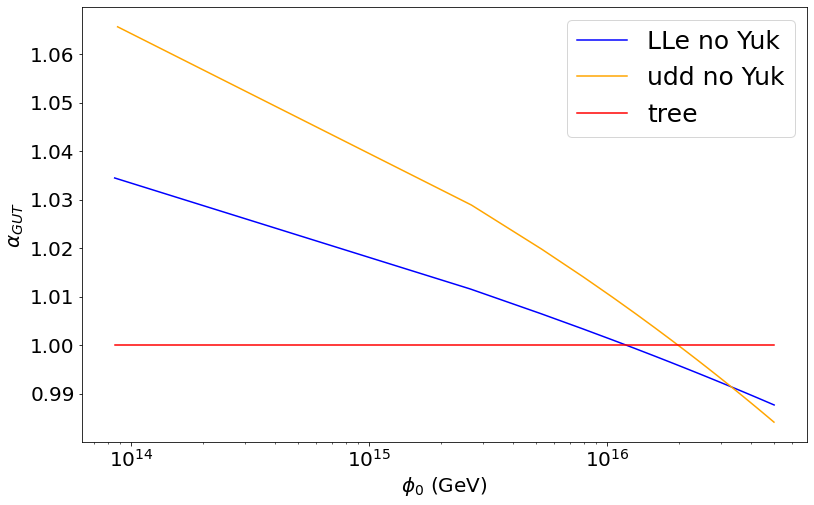

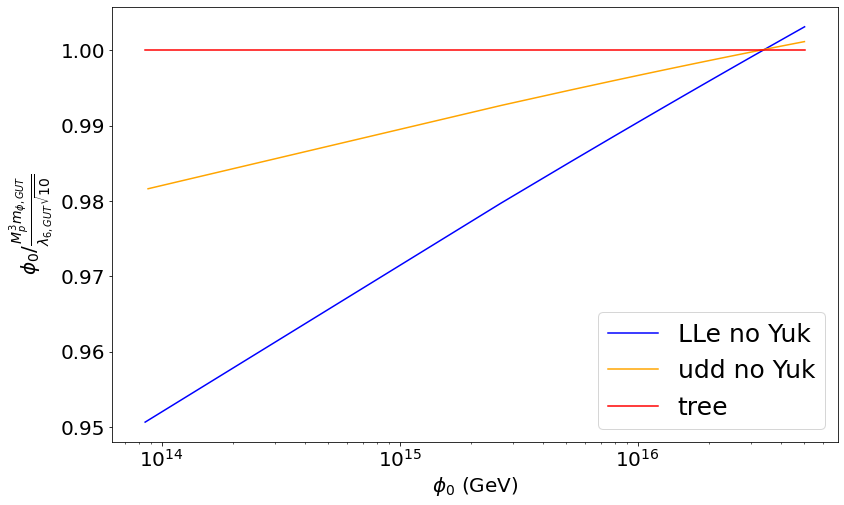

In [11]:
def pd_to_array(file, column, dtype=float):
    if dtype == float:
        return np.array([mp.mpf(x) for x in file[column]], dtype=float)
    else:
        return np.array([mp.mpf(x) for x in file[column]])

m0_udd_09653_20 = pd.read_csv('20pts_m0.0_udd_9653.csv',engine='python',dtype=str)
m0_lle_09653_20 = pd.read_csv('20pts_m0.0_lle_9653.csv',engine='python',dtype=str)
def alpha(file, dtype=float):
    if dtype == float:
        return pd_to_array(file, 'A6', dtype=float)**2/(40*pd_to_array(file, 'mphi', dtype=float)**2)
    else:
        return pd_to_array(file, 'A6', dtype='mp')**mp.mpf('2')/(mp.mpf('40')*pd_to_array(file, 'mphi', dtype='mp')**mp.mpf('2'))
    

plt.figure(1)
plt.semilogx()
plt.plot(pd_to_array(m0_udd_09653_20, 'phi0B'), alpha(m0_udd_09653_20),'blue', label='LLe no Yuk')
plt.plot(pd_to_array(m0_lle_09653_20, 'phi0B'), alpha(m0_lle_09653_20),'orange', label='udd no Yuk')
plt.plot(pd_to_array(m0_udd_09653_20, 'phi0B'), len(pd_to_array(m0_udd_09653_20, 'phi0B'))*[1],'red', label='tree')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\alpha_{GUT}$')
plt.legend(fontsize=25)
define_plot_resolution()

def phi0B(file, dtype=float):
    if dtype == float:
        return (Mp**3*pd_to_array(file, 'mphi', dtype='mp')/(mp.sqrt(mp.mpf('10'))*pd_to_array(file, 'lambda6', dtype='mp')))**mp.mpf('0.25')
    else:
        return (Mp**3*pd_to_array(file, 'mphi', dtype='mp')/(mp.sqrt(mp.mpf('10'))*pd_to_array(file, 'lambda6', dtype='mp')))**mp.mpf('0.25')
    
        
plt.figure(2)
plt.semilogx()
plt.plot(pd_to_array(m0_udd_09653_20, 'phi0B'), pd_to_array(m0_udd_09653_20, 'phi0B')/phi0B(m0_udd_09653_20),'blue', label='LLe no Yuk')
plt.plot(pd_to_array(m0_lle_09653_20, 'phi0B'), pd_to_array(m0_lle_09653_20, 'phi0B')/phi0B(m0_lle_09653_20),'orange', label='udd no Yuk')
plt.plot(pd_to_array(m0_udd_09653_20, 'phi0B'), len(pd_to_array(m0_udd_09653_20, 'phi0B'))*[1],'red', label='tree')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\phi_0/\frac{M_p^3m_{\phi,GUT}}{\lambda_{6,GUT}\sqrt{10}}$')
plt.legend(fontsize=25)
define_plot_resolution()


# A) MSSM (tree) points for cosmo

In [12]:
def ns_r_plan(phi0, alpha, lnRrad, Pstar):
    xstar = x_rrad(alpha, phi0/Mp, lnRrad, Pstar)
    eps1star = norm_eps1(xstar,alpha,phi0/Mp)
    eps2star = norm_eps2(xstar,alpha,phi0/Mp)
    eps3star = norm_eps3(xstar,alpha,phi0/Mp)
    ns = 1-2*eps1star-eps2star
    r = 16*eps1star
    alpha_s = -2*eps1star*eps2star-eps2star*eps3star
    return float(ns), float(r), float(alpha_s)

lnRrad_input = mp.mpf('0')
As_input = mp.mpf('2.10310517e-9')
delta_alpha2 = [mp.mpf('8e-30')*(mp.mpf('1.92e-8')/mp.mpf('8e-30'))**(i/mp.mpf('50')) for i in range(50)]

def generate_examples(phi0_start, alpha_start, delta_alpha):
    L = []
    for i in range(-40,60):
        alpha = alpha_start+i*delta_alpha
        L.append([*ns_r_plan(phi0_start, alpha, lnRrad_input, As_input), float(mp.log10(mp.fabs(1-alpha)))])
    return L

phi0_start2 = np.array([mp.mpf(phi0) for phi0 in np.array(pd.read_csv('tree09665Inst.csv', dtype = str, index_col=0)['phi0B'])][::2][:-1])
alpha_start2 = np.array([mp.mpf(phi0) for phi0 in np.array(pd.read_csv('tree09665Inst.csv', dtype = str, index_col=0)['alpha'])][::2][:-1])

example_tot2 = []
for i in range(50):
    example_i = generate_examples(phi0_start2[i], alpha_start2[i], delta_alpha2[i])
    example_tot2 = example_tot2+example_i
    print('.',end="", flush=True)
example_tot2 = np.transpose(example_tot2)
np.save('examples_tree.npy', example_tot2)

..................................................

In [14]:
################# PLOT EXAMPLE_TOT2 #####################

from getdist.mcsamples import loadMCSamples
import getdist.plots as gdplt

s = loadMCSamples('plikHM_TTTEEE_lowl_lowE_BK15_lensing/base_nrun_r_plikHM_TTTEEE_lowl_lowE_BK15_lensing')

plot1 = gdplt.get_subplot_plotter(subplot_size=4)
plot1.triangle_plot(s, ['A','ns', 'nrun', 'r'], filled = True)
nsr = plot1.subplots[3,1]
plot1.subplots[3,3].semilogx()
nsr.semilogy()
nsr.axis(ymin=10**-43,ymax=100)
example_tot2 = np.load('examples_tree.npy')

tac = nsr.scatter(example_tot2[0], example_tot2[1], c=example_tot2[3], cmap = 'gist_rainbow',  s=5, alpha = 0.7)

nsr.plot([example_tot2[0][-1], example_tot2[0][-100]],[example_tot2[1][-1],example_tot2[1][-100]],label=r'$\phi_0=M_p$', color = 'purple', lw=4, alpha = 0.8)
nsr.plot([example_tot2[0][0], example_tot2[0][99]],[example_tot2[1][0],example_tot2[1][99]],label=r'$\phi_0=1e13$', color = 'red', lw=4, alpha = 0.8)

plot1.subplots[2,1].scatter(example_tot2[0], example_tot2[2], c=example_tot2[3], cmap = 'gist_rainbow', s=1)
plot1.subplots[2,1].plot([example_tot2[0][-1], example_tot2[0][-100]],[example_tot2[2][-1],example_tot2[2][-100]],label=r'$\phi_0=M_p$', color = 'purple', lw=5, alpha = 0.8)
plot1.subplots[2,1].plot([example_tot2[0][0], example_tot2[0][99]],[example_tot2[2][0],example_tot2[2][99]],label=r'$\phi_0=1e13$', color = 'red', lw=5, alpha = 0.8)

plot1.subplots[3,2].scatter(example_tot2[2], example_tot2[1], c=example_tot2[3], cmap = 'gist_rainbow', s=1)
plot1.subplots[3,2].plot([example_tot2[2][-1], example_tot2[2][-100]],[example_tot2[1][-1],example_tot2[1][-100]],label=r'$\phi_0=M_p$', color = 'purple', lw=5, alpha = 0.8)
plot1.subplots[3,2].plot([example_tot2[2][0], example_tot2[2][99]],[example_tot2[1][0],example_tot2[1][99]],label=r'$\phi_0=1e13$', color = 'red', lw=5, alpha = 0.8)

plot1.subplots[1,0].scatter([2.203e-9]*len(example_tot2[0]), example_tot2[0], c=example_tot2[3], cmap = 'gist_rainbow', s=1)
plot1.subplots[2,0].scatter([2.203e-9]*len(example_tot2[0]), example_tot2[2], c=example_tot2[3], cmap = 'gist_rainbow', s=1)
plot1.subplots[3,0].scatter([2.203e-9]*len(example_tot2[0]), example_tot2[1], c=example_tot2[3], cmap = 'gist_rainbow', s=1)

bar = plt.colorbar(tac)
bar.ax.tick_params(labelsize=12) 
bar.ax.set_xlabel(r'$log(1-\alpha)$',fontsize=15, family='serif')
nsr.legend(fontsize=20, loc=(1,2))

plt.save('ns_r.png')